# Pair Programming Asunciones Regresión Lineal

---

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticos
from scipy import stats
import researchpy as rp
from scipy.stats import levene

# Warnings
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,8) 

In [3]:
df= pd.read_csv('../files/life_data_limp.csv', index_col=0)
df.head(2)

,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,measles,...,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,Developing,Asia,2015.0,65.0,263.0,62.0,0.01,65.0,1154.0,...,83.0,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,Asia,2014.0,59.9,271.0,64.0,0.01,62.0,492.0,...,86.0,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0


En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Recordamos que estas asunciones son:


---

### 1. Normalidad (ya la deberíais haber evaluado)

`Test de Shapiro`

In [4]:
stats.shapiro(df['life_expectancy'])

ShapiroResult(statistic=0.9547738432884216, pvalue=3.436392262640181e-29)

    Nuestra variables de respuesta NO es normal.

`Análisis gráfico`

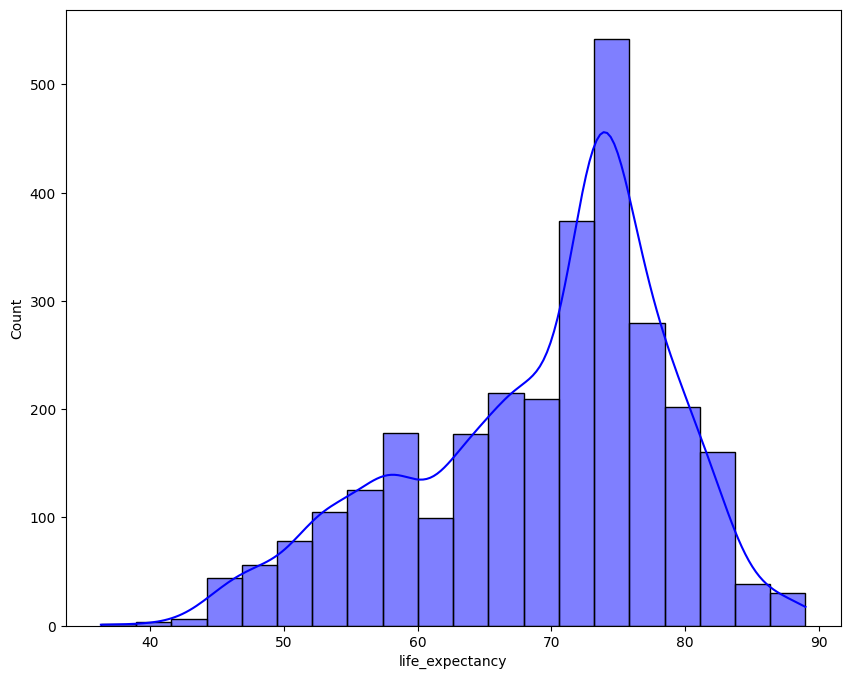

In [5]:
# primero lo hacemos visualmente

sns.histplot(df['life_expectancy'],  bins=20, kde = True, 
        color = "blue",);

---

### 2. Homogeneidad de varianzas

In [6]:
len(df["country"].value_counts())

191

In [7]:
df["country"].value_counts()

Indonesia                32
Afghanistan              16
Paraguay                 16
Nicaragua                16
Niger                    16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Dominica                  1
Saint Kitts and Nevis     1
Name: country, Length: 191, dtype: int64

``Análisis gráfico``

In [8]:
df.columns

Index(['country', 'status', 'continente', 'year', 'life_expectancy',
       'adult_mortality', 'infant_deaths', 'alcohol', 'hepatitis_b', 'measles',
       'bmi', 'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'thinness__1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

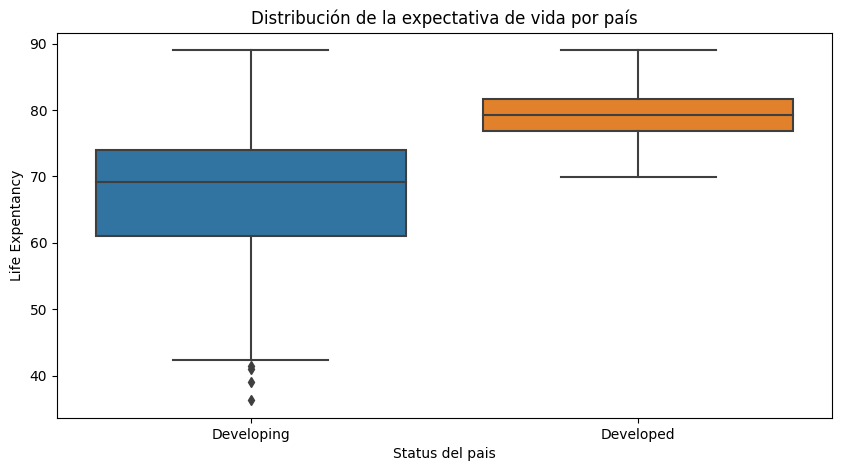

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.boxplot(
    x       = 'status',
    y       = 'life_expectancy',
    data    = df,
    palette = "tab10",
    ax      = ax
)
ax.set_title("Distribución de la expectativa de vida por país")
ax.set_ylabel("Life Expentancy")
ax.set_xlabel("Status del pais");

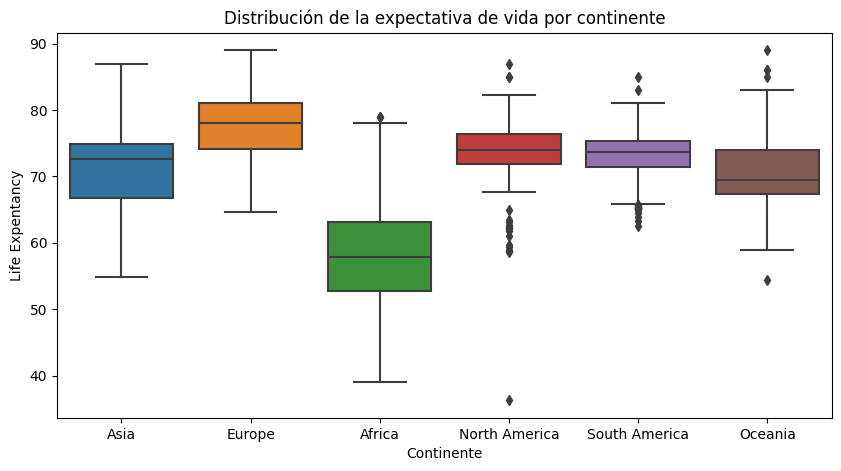

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.boxplot(
    x       = 'continente',
    y       = 'life_expectancy',
    data    = df,
    palette = "tab10",
    ax      = ax
)
ax.set_title("Distribución de la expectativa de vida por continente")
ax.set_ylabel("Life Expentancy")
ax.set_xlabel("Continente");

In [11]:
resultados_test = {}

# seleccionamos solo las columnas numéricas y eliminamos la columna de la variable respuesta
numericas_columnas = df.select_dtypes(include = np.number).drop("life_expectancy", axis = 1).columns

#iteremos por la lista de las columnas numéricas
for col in numericas_columnas:
    
    statistic, p_val = levene(df[col], df.life_expectancy, center='median')
    resultados_test[col] = p_val

In [12]:
resultados_test

{'year': 8.491381713735918e-156,
 'adult_mortality': 0.0,
 'infant_deaths': 7.178503608328457e-40,
 'alcohol': 1.4096221455558796e-214,
 'hepatitis_b': 1.5013195233881626e-109,
 'measles': 1.3067314793222535e-26,
 'bmi': 0.0,
 'under-five_deaths': 6.536902569400365e-50,
 'polio': 6.546479118690837e-58,
 'total_expenditure': 0.0,
 'diphtheria': 2.3163396830654396e-58,
 'hiv/aids': 4.4573506439481994e-287,
 'gdp': 3.2524296171850273e-139,
 'thinness__1-19_years': 4.8263846280223164e-222,
 'thinness_5-9_years': 1.1100452189438007e-217,
 'income_composition_of_resources': 0.0,
 'schooling': 4.2309469925581846e-290}

In [13]:
df.columns

Index(['country', 'status', 'continente', 'year', 'life_expectancy',
       'adult_mortality', 'infant_deaths', 'alcohol', 'hepatitis_b', 'measles',
       'bmi', 'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'thinness__1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

In [15]:
desarrollados= df[df["status"] == 'Developed']["life_expectancy"]
endesarrollo = df[df["status"] == 'Developing']["life_expectancy"]

In [16]:
# Levene test
levene_test = stats.levene(desarrollados, endesarrollo, center='median')
levene_test

LeveneResult(statistic=284.6220828350005, pvalue=5.227069407753493e-61)

In [17]:
# Bartlett test
bartlett_test = stats.bartlett(desarrollados, endesarrollo)
bartlett_test

BartlettResult(statistic=402.773617796336, pvalue=1.3713808276316723e-89)

    En ambos test el p-valor es < 0,05 por lo que tenemos que rechazar la H0, es decir las variables no son Homocedasticas, son Heterocedasticas entre si.

## Independencia de las variables

La prueba de independencia comprueba la dependencia entre variables y es una prueba general. 

In [18]:
crosstab, test_results, expected = rp.crosstab(df["infant_deaths"], df["under-five_deaths"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")


In [19]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 46492.0) =,326840.7724
1,p-value =,0.0000
2,Cramer's V =,0.7535


El p-valor es menor que 0.05, por lo tanto, nuestras variables son dependientes entre ellas. 


---

#### `Luego de relizar todo el analisis estadistico al ver que las categorias de la columna 'status' (desarrollados y en desarrollo) son muy ambiguas, es decir son heterocedasticas, por lo que hemos decidido dividir el dataframe en dos uno por cada catgoria y optamos por trabajar con los paises en desarrollo.`